# DATA 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing research data
prep0 = pd.read_csv('reactor_data.csv')
prep0.head()

,Time,Running_cycle,FI-001,FI-002,TC-001,TC-002,DT-001,DT-002,DP-001,DP-002,...,TI-034,TI-035,TI-036,TI-037,TI-038,TI-039,TI-040,TI-041,TI-042,CONVERSION
0,6/29/2004 4:00,1,57.376325,669.985139,319.496265,270.298088,68.159380,42.059748,16.935505,0.967330,...,308.465166,293.210571,288.108362,312.395056,305.310342,303.123348,310.085243,309.464836,308.546075,93.200705
1,6/29/2004 4:00,2,57.415584,670.175315,319.506829,270.557335,68.149101,43.819212,16.906026,0.974280,...,310.060319,294.679554,289.054518,314.409080,307.335927,304.765668,311.408695,310.634102,309.389468,93.128145
2,6/29/2004 4:00,3,57.454843,670.365491,319.517393,270.816583,68.138821,45.578677,16.876548,0.981229,...,311.655473,296.148536,290.000675,316.423104,309.361511,306.407989,312.732147,311.803369,310.232862,93.055586
3,6/30/2004 0:00,4,57.543094,670.622632,319.553869,271.363961,68.380253,49.568133,16.811533,1.000760,...,315.280320,299.371886,292.082630,320.951668,313.762146,309.971053,315.635902,314.406282,312.107740,92.830864
4,6/30/2004 0:00,5,57.470024,670.828064,319.515243,270.964477,67.735901,45.934814,16.879419,0.977966,...,312.047943,296.581512,290.251892,316.915100,309.949554,306.832458,313.039825,312.000702,310.427032,93.200151


In [3]:
#Identity variables name
prep0.columns

Index(['Time', 'Running_cycle', 'FI-001', 'FI-002', 'TC-001', 'TC-002',
       'DT-001', 'DT-002', 'DP-001', 'DP-002', 'DP-003', 'DP-004', 'PI-001',
       'PI-002', 'PI-003', 'PI-004', 'AI-001', 'AI-002', 'AI-003', 'AI-004',
       'AI-005', 'AI-006', 'AI-007', 'AI-008', 'AI-009', 'AI-010', 'RX-001',
       'TI-001', 'TI-002', 'TI-005', 'TI-006', 'TI-007', 'TI-008', 'TI-009',
       'TI-010', 'TI-011', 'TI-012', 'TI-013', 'TI-014', 'TI-015', 'TI-018',
       'TI-019', 'TI-020', 'TI-021', 'TI-022', 'TI-023', 'TI-024', 'TI-025',
       'TI-026', 'TI-027', 'TI-028', 'TI-029', 'TI-030', 'TI-031', 'TI-032',
       'TI-033', 'TI-034', 'TI-035', 'TI-036', 'TI-037', 'TI-038', 'TI-039',
       'TI-040', 'TI-041', 'TI-042', 'CONVERSION'],
      dtype='object')

# DATA PREPARATION, CLEANING, AND FEATURE EXTRACTION

In [4]:
#Removing unused 'FI-002', 'NO', 'Time' column
prep1 = prep0.iloc[:, :].drop(['FI-001','Running_cycle','Time'], axis=1)
prep1

,FI-002,TC-001,TC-002,DT-001,DT-002,DP-001,DP-002,DP-003,DP-004,PI-001,...,TI-034,TI-035,TI-036,TI-037,TI-038,TI-039,TI-040,TI-041,TI-042,CONVERSION
0,669.985139,319.496265,270.298088,68.159380,42.059748,16.935505,0.967330,14.547414,32.450250,63.610362,...,308.465166,293.210571,288.108362,312.395056,305.310342,303.123348,310.085243,309.464836,308.546075,93.200705
1,670.175315,319.506829,270.557335,68.149101,43.819212,16.906026,0.974280,14.532135,32.412441,63.569363,...,310.060319,294.679554,289.054518,314.409080,307.335927,304.765668,311.408695,310.634102,309.389468,93.128145
2,670.365491,319.517393,270.816583,68.138821,45.578677,16.876548,0.981229,14.516856,32.374633,63.528364,...,311.655473,296.148536,290.000675,316.423104,309.361511,306.407989,312.732147,311.803369,310.232862,93.055586
3,670.622632,319.553869,271.363961,68.380253,49.568133,16.811533,1.000760,14.494793,32.307087,63.432052,...,315.280320,299.371886,292.082630,320.951668,313.762146,309.971053,315.635902,314.406282,312.107740,92.830864
4,670.828064,319.515243,270.964477,67.735901,45.934814,16.879419,0.977966,14.471894,32.329281,63.531145,...,312.047943,296.581512,290.251892,316.915100,309.949554,306.832458,313.039825,312.000702,310.427032,93.200151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18718,833.271973,323.390320,286.120880,67.911438,33.537292,20.344055,0.065580,20.184771,40.909565,70.437078,...,312.373871,301.223907,304.223450,299.636078,304.582642,300.072601,290.822022,289.512878,291.541504,94.829638
18719,832.827393,323.574768,286.037537,67.504608,33.254303,20.169985,0.066432,20.349388,40.900963,70.312330,...,312.328278,301.028229,304.057129,299.530151,304.531738,300.036346,290.642395,289.317627,291.300690,94.831773
18720,833.848450,323.598389,286.136810,67.682678,33.338257,20.028092,0.126205,20.386351,40.855808,70.336130,...,312.472900,301.012054,304.044495,299.594665,304.567383,300.047790,290.718109,289.436035,291.387756,94.878506
18721,833.529907,323.480347,286.043396,67.667175,32.947021,20.317225,0.075650,20.188131,40.896164,70.413744,...,312.350281,301.124390,304.156006,299.460388,304.473602,299.988190,290.674011,289.329468,291.345581,94.495033


In [5]:
#Convert timestamp object data to numerical
prep2 = prep1.apply(pd.to_numeric)
print(prep2.dtypes, prep2.shape)

FI-002        float64
TC-001        float64
TC-002        float64
DT-001        float64
DT-002        float64
               ...   
TI-039        float64
TI-040        float64
TI-041        float64
TI-042        float64
CONVERSION    float64
Length: 63, dtype: object (18723, 63)


In [6]:
#Check if there's missing value
prep2.isnull().sum()

FI-002        0
TC-001        0
TC-002        0
DT-001        0
DT-002        0
             ..
TI-039        0
TI-040        0
TI-041        0
TI-042        0
CONVERSION    0
Length: 63, dtype: int64

<AxesSubplot:xlabel='FI-002'>

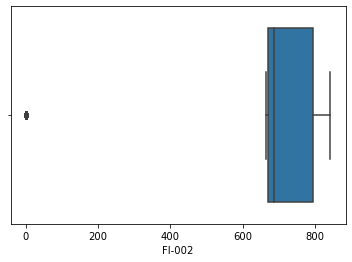

In [7]:
#Removing data where plant is not run, by identifying total raw material 'FI-001' loss flow rate
sns.boxplot(data=prep2,x=prep2['FI-002'])

In [8]:
#Remove shut down data by identifying outlier FI-001 with Inter Quantile Range Method

from numpy import percentile
# calculate interquartile range
q25_a, q75_a = percentile(prep2['FI-002'], 25), percentile(prep2['FI-002'], 75)
iqr_a = q75_a - q25_a
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25_a, q75_a, iqr_a))
# calculate the outlier cutoff
cut_off_a = iqr_a * 1.5
lower_a, upper_a = q25_a - cut_off_a, q75_a + cut_off_a
print('Lower whisker=%.2f, Upper whisker=%.2f' % (lower_a, upper_a))
# identify outliers
shut_down_data = prep2[(prep2['FI-002']<lower_a)|(prep2['FI-002']>upper_a)]
print('Shut down data: %d' % len(shut_down_data))
# remove outliers
shut_down_removed = prep2[(prep2['FI-002']>lower_a)&(prep2['FI-002']<upper_a)]
print('Non-Shut down data: %d' % len(shut_down_removed))

Percentiles: 25th=670.419, 75th=794.510, IQR=124.090
Lower whisker=484.28, Upper whisker=980.65
Shut down data: 2510
Non-Shut down data: 16213


<AxesSubplot:xlabel='FI-002'>

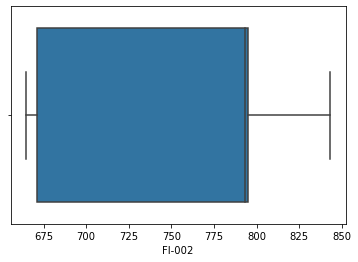

In [9]:
#Check again if there's still outlier in 'FI-001'
sns.boxplot(data=shut_down_removed, x=shut_down_removed['FI-002'])

In [10]:
prep3 = shut_down_removed
prep3.shape

(16213, 63)

In [11]:
#Remove outlier for all variables while keeps the whole row intact
lb = prep3.quantile(0.01)
ub = prep3.quantile(0.99)

prep4 = prep3[(prep3 > lb) & (prep3 < ub)]
prep4

,FI-002,TC-001,TC-002,DT-001,DT-002,DP-001,DP-002,DP-003,DP-004,PI-001,...,TI-034,TI-035,TI-036,TI-037,TI-038,TI-039,TI-040,TI-041,TI-042,CONVERSION
0,669.985139,319.496265,270.298088,68.159380,42.059748,16.935505,0.967330,14.547414,32.450250,63.610362,...,308.465166,293.210571,288.108362,312.395056,305.310342,303.123348,310.085243,309.464836,308.546075,93.200705
1,670.175315,319.506829,270.557335,68.149101,43.819212,16.906026,0.974280,14.532135,32.412441,63.569363,...,310.060319,294.679554,289.054518,314.409080,307.335927,304.765668,311.408695,310.634102,309.389468,93.128145
2,670.365491,319.517393,270.816583,68.138821,45.578677,16.876548,0.981229,14.516856,32.374633,63.528364,...,311.655473,296.148536,290.000675,316.423104,309.361511,306.407989,312.732147,311.803369,310.232862,93.055586
3,670.622632,319.553869,271.363961,68.380253,49.568133,16.811533,1.000760,14.494793,32.307087,63.432052,...,315.280320,299.371886,292.082630,320.951668,313.762146,309.971053,315.635902,314.406282,312.107740,92.830864
4,670.828064,319.515243,270.964477,67.735901,45.934814,16.879419,0.977966,14.471894,32.329281,63.531145,...,312.047943,296.581512,290.251892,316.915100,309.949554,306.832458,313.039825,312.000702,310.427032,93.200151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18718,833.271973,323.390320,286.120880,67.911438,33.537292,20.344055,0.065580,20.184771,40.909565,70.437078,...,312.373871,301.223907,304.223450,299.636078,304.582642,300.072601,290.822022,289.512878,291.541504,94.829638
18719,832.827393,323.574768,286.037537,67.504608,33.254303,20.169985,0.066432,20.349388,40.900963,70.312330,...,312.328278,301.028229,304.057129,299.530151,304.531738,300.036346,290.642395,289.317627,291.300690,94.831773
18720,833.848450,323.598389,286.136810,67.682678,33.338257,20.028092,0.126205,20.386351,40.855808,70.336130,...,312.472900,301.012054,304.044495,299.594665,304.567383,300.047790,290.718109,289.436035,291.387756,94.878506
18721,833.529907,323.480347,286.043396,67.667175,32.947021,20.317225,0.075650,20.188131,40.896164,70.413744,...,312.350281,301.124390,304.156006,299.460388,304.473602,299.988190,290.674011,289.329468,291.345581,94.495033


In [12]:
prep4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16213 entries, 0 to 18722
Data columns (total 63 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   FI-002      15887 non-null  float64
 1   TC-001      15886 non-null  float64
 2   TC-002      15887 non-null  float64
 3   DT-001      15886 non-null  float64
 4   DT-002      15888 non-null  float64
 5   DP-001      15886 non-null  float64
 6   DP-002      15816 non-null  float64
 7   DP-003      15885 non-null  float64
 8   DP-004      15886 non-null  float64
 9   PI-001      15886 non-null  float64
 10  PI-002      15886 non-null  float64
 11  PI-003      15887 non-null  float64
 12  PI-004      15887 non-null  float64
 13  AI-001      15887 non-null  float64
 14  AI-002      15887 non-null  float64
 15  AI-003      15887 non-null  float64
 16  AI-004      15887 non-null  float64
 17  AI-005      15851 non-null  float64
 18  AI-006      15887 non-null  float64
 19  AI-007      15887 non-nul

<AxesSubplot:>

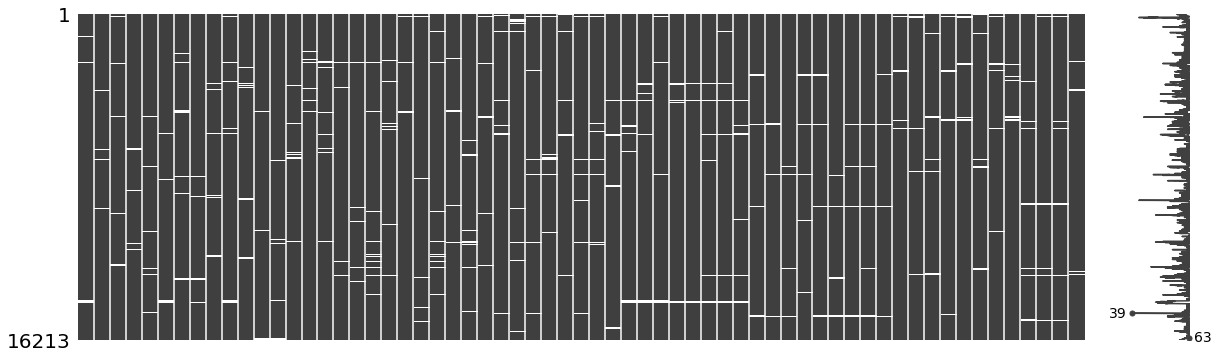

In [13]:
#Check deleted value position
import missingno as mno
mno.matrix(prep4, figsize = (20, 6))

In [14]:
#Fill missing value (from removed outlier) with imputer
prep5 = prep4.interpolate(method ='linear', limit_direction ='forward')
prep5.head()

,FI-002,TC-001,TC-002,DT-001,DT-002,DP-001,DP-002,DP-003,DP-004,PI-001,...,TI-034,TI-035,TI-036,TI-037,TI-038,TI-039,TI-040,TI-041,TI-042,CONVERSION
0,669.985139,319.496265,270.298088,68.159380,42.059748,16.935505,0.967330,14.547414,32.450250,63.610362,...,308.465166,293.210571,288.108362,312.395056,305.310342,303.123348,310.085243,309.464836,308.546075,93.200705
1,670.175315,319.506829,270.557335,68.149101,43.819212,16.906026,0.974280,14.532135,32.412441,63.569363,...,310.060319,294.679554,289.054518,314.409080,307.335927,304.765668,311.408695,310.634102,309.389468,93.128145
2,670.365491,319.517393,270.816583,68.138821,45.578677,16.876548,0.981229,14.516856,32.374633,63.528364,...,311.655473,296.148536,290.000675,316.423104,309.361511,306.407989,312.732147,311.803369,310.232862,93.055586
3,670.622632,319.553869,271.363961,68.380253,49.568133,16.811533,1.000760,14.494793,32.307087,63.432052,...,315.280320,299.371886,292.082630,320.951668,313.762146,309.971053,315.635902,314.406282,312.107740,92.830864
4,670.828064,319.515243,270.964477,67.735901,45.934814,16.879419,0.977966,14.471894,32.329281,63.531145,...,312.047943,296.581512,290.251892,316.915100,309.949554,306.832458,313.039825,312.000702,310.427032,93.200151


In [15]:
prep5.isnull().sum()

FI-002        0
TC-001        0
TC-002        0
DT-001        0
DT-002        0
             ..
TI-039        0
TI-040        0
TI-041        0
TI-042        0
CONVERSION    0
Length: 63, dtype: int64

In [16]:
prep5.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
FI-002,16213.0,746.679192,68.974394,668.778687,671.182739,793.192139,794.781494,836.910889
TC-001,16213.0,322.950928,5.226784,312.015381,319.500427,322.585754,326.562042,334.638306
TC-002,16213.0,278.760113,6.484141,266.984192,273.608520,278.874756,284.130310,292.542786
DT-001,16213.0,66.416289,6.934921,51.402039,62.645111,67.749573,71.104828,80.546149
DT-002,16213.0,37.237985,11.090657,22.402069,28.286957,34.591809,43.110779,69.457214
...,...,...,...,...,...,...,...,...
TI-039,16213.0,304.102563,7.659816,288.000122,298.397888,304.587952,309.892517,320.615326
TI-040,16213.0,305.790454,14.960208,278.586883,291.905914,307.346619,316.723419,336.157837
TI-041,16213.0,307.477383,14.811054,281.091980,294.418945,307.079346,319.622864,336.463501
TI-042,16213.0,304.674310,16.186075,277.008789,290.616974,303.848419,318.172211,335.618439


In [17]:
#Correlation matrix after data imputation
corr2 = prep5.corr()
corr2.style.background_gradient(cmap='coolwarm')

In [18]:
#Data Scaling with normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# transform data
scaled_data = pd.DataFrame(scaler.fit_transform(prep5), columns = prep5.columns)
print(scaled_data)

         FI-002    TC-001    TC-002    DT-001    DT-002    DP-001    DP-002  \
0      0.007176  0.330677  0.129659  0.574982  0.417758  0.137982  0.091838   
1      0.008307  0.331144  0.139802  0.574629  0.455150  0.130618  0.092498   
2      0.009438  0.331611  0.149945  0.574277  0.492541  0.123254  0.093158   
3      0.010967  0.333223  0.171362  0.582561  0.577324  0.107012  0.095012   
4      0.012189  0.331516  0.155732  0.560452  0.500110  0.123971  0.092848   
...         ...       ...       ...       ...       ...       ...       ...   
16208  0.978357  0.502806  0.748738  0.566475  0.236642  0.989480  0.006215   
16209  0.975713  0.510959  0.745477  0.552515  0.230628  0.945995  0.006296   
16210  0.981786  0.512003  0.749361  0.558625  0.232412  0.910548  0.011972   
16211  0.979891  0.506785  0.745706  0.558093  0.224098  0.982777  0.007171   
16212  0.979891  0.506785  0.745706  0.558093  0.224098  0.982777  0.007171   

         DP-003    DP-004    PI-001  ...    TI-034 

In [19]:
# Pearson correlation coefficient
select_corr = scaled_data.corr()["CONVERSION"].sort_values(ascending=False)[1:]

# absolute for positive values
abs_corr = abs(select_corr)

# random threshold for features to keep
selected_features = abs_corr[abs_corr>0.4]
selected_features

DP-001    0.807746
FI-002    0.806157
TI-014    0.795037
TI-013    0.764606
TI-018    0.700174
DP-004    0.675512
TI-001    0.667385
TI-019    0.647600
TI-022    0.644449
DT-001    0.544135
TI-012    0.542178
DP-002    0.530594
PI-002    0.473997
TI-005    0.472168
TI-020    0.465437
PI-001    0.430794
TI-024    0.408135
AI-007    0.462468
TI-010    0.487901
TI-007    0.495802
TI-031    0.504460
TI-026    0.542696
TI-011    0.582506
TI-008    0.608041
TI-037    0.676970
AI-009    0.797870
Name: CONVERSION, dtype: float64

In [20]:
len(selected_features)

26

In [21]:
# Drop low correlation features
prep6 = scaled_data[selected_features.index].interpolate(method ='linear', limit_direction ='backward')
prep6.isnull().sum()

DP-001    0
FI-002    0
TI-014    0
TI-013    0
TI-018    0
DP-004    0
TI-001    0
TI-019    0
TI-022    0
DT-001    0
TI-012    0
DP-002    0
PI-002    0
TI-005    0
TI-020    0
PI-001    0
TI-024    0
AI-007    0
TI-010    0
TI-007    0
TI-031    0
TI-026    0
TI-011    0
TI-008    0
TI-037    0
AI-009    0
dtype: int64

In [22]:
y_lasso = scaled_data["CONVERSION"]
X_lasso = prep6

In [23]:
#Eliminate multicollinearity by removing irrelavant features with ebbedded method
from sklearn.linear_model import LassoCV
reg = LassoCV()
reg.fit(X_lasso, y_lasso)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_lasso,y_lasso))
coef = pd.Series(reg.coef_, index = X_lasso.columns)

Best alpha using built-in LassoCV: 0.000093
Best score using built-in LassoCV: 0.933171


In [24]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 23 variables and eliminated the other 3 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

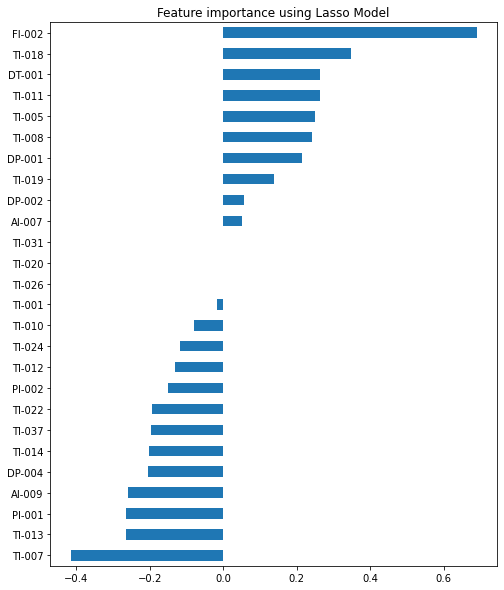

In [25]:
#Visualize important feature
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [26]:
#Select relevant reatures
abs_coef = abs(coef)
relevant_features = abs_coef[abs_coef>0]
prep7 = prep6[relevant_features.index].sort_index(axis=1, ascending=True)
prep7['CONVERSION'] = scaled_data["CONVERSION"]
prep7.shape

(16213, 24)

In [27]:
#Showing correlation between relevant features
corr3 = prep7.corr().style.background_gradient(cmap='coolwarm')
corr3

,AI-007,AI-009,DP-001,DP-002,DP-004,DT-001,FI-002,PI-001,PI-002,TI-001,TI-005,TI-007,TI-008,TI-010,TI-011,TI-012,TI-013,TI-014,TI-018,TI-019,TI-022,TI-024,TI-037,CONVERSION
AI-007,1.000000,0.508171,-0.605068,-0.365598,-0.598543,-0.329122,-0.633123,-0.380027,-0.473995,-0.630089,-0.390715,0.496358,0.633507,0.485211,0.611309,-0.421666,-0.604346,-0.610053,-0.352382,-0.425173,-0.502453,0.286689,0.343341,-0.462468
AI-009,0.508171,1.000000,-0.899661,-0.620813,-0.894308,-0.743551,-0.895437,-0.711594,-0.792831,-0.752550,-0.576772,0.441013,0.658815,0.488060,0.633110,-0.616926,-0.874695,-0.924246,-0.692661,-0.730534,-0.771141,0.188240,0.437556,-0.797870
DP-001,-0.605068,-0.899661,1.000000,0.620755,0.889258,0.539755,0.965602,0.706694,0.738625,0.881947,0.492134,-0.567006,-0.808451,-0.608148,-0.773423,0.621358,0.891708,0.913155,0.601093,0.716365,0.745159,-0.354156,-0.621459,0.807746
DP-002,-0.365598,-0.620813,0.620755,1.000000,0.722134,0.456555,0.640760,0.588011,0.645439,0.725394,0.308169,-0.622378,-0.619462,-0.727030,-0.678629,0.003394,0.527995,0.707311,0.388921,0.694828,0.599367,-0.100517,-0.166654,0.530594
DP-004,-0.598543,-0.894308,0.889258,0.722134,1.000000,0.607239,0.909023,0.723330,0.883843,0.913648,0.429869,-0.648597,-0.812200,-0.677713,-0.811741,0.460695,0.808411,0.907286,0.585408,0.640425,0.660184,-0.140233,-0.374423,0.675512
DT-001,-0.329122,-0.743551,0.539755,0.456555,0.607239,1.000000,0.530917,0.536242,0.590392,0.355050,0.414796,-0.220331,-0.330181,-0.271744,-0.304564,0.334746,0.570736,0.655155,0.457136,0.534459,0.512240,0.131472,-0.095858,0.544135
FI-002,-0.633123,-0.895437,0.965602,0.640760,0.909023,0.530917,1.000000,0.757240,0.810297,0.901855,0.474443,-0.613811,-0.828346,-0.644734,-0.809575,0.611593,0.894242,0.928547,0.648715,0.696366,0.735951,-0.336182,-0.585382,0.806157
PI-001,-0.380027,-0.711594,0.706694,0.588011,0.723330,0.536242,0.757240,1.000000,0.900401,0.608901,0.371899,-0.400631,-0.563919,-0.509155,-0.587717,0.382584,0.675045,0.723003,0.503509,0.677317,0.632747,-0.043757,-0.161847,0.430794
PI-002,-0.473995,-0.792831,0.738625,0.645439,0.883843,0.590392,0.810297,0.900401,1.000000,0.741510,0.375364,-0.515149,-0.664529,-0.577960,-0.686526,0.399252,0.704911,0.794443,0.552277,0.600037,0.604474,0.015895,-0.156943,0.473997
TI-001,-0.630089,-0.752550,0.881947,0.725394,0.913648,0.355050,0.901855,0.608901,0.741510,1.000000,0.329103,-0.746413,-0.887895,-0.769282,-0.890285,0.376772,0.746975,0.837916,0.458846,0.591936,0.610212,-0.310427,-0.511568,0.667385


In [28]:
#Drop high correlation variables among predictor
prep8 = prep7.drop(['FI-002', 'TI-001','TI-007', 'TI-010', 'TI-011', 'TI-014', 'PI-001'], axis = 1)

In [29]:
#Showing correlation between relevant features
corr4 = prep8.corr().style.background_gradient(cmap='coolwarm')
corr4

,AI-007,AI-009,DP-001,DP-002,DP-004,DT-001,PI-002,TI-005,TI-008,TI-012,TI-013,TI-018,TI-019,TI-022,TI-024,TI-037,CONVERSION
AI-007,1.000000,0.508171,-0.605068,-0.365598,-0.598543,-0.329122,-0.473995,-0.390715,0.633507,-0.421666,-0.604346,-0.352382,-0.425173,-0.502453,0.286689,0.343341,-0.462468
AI-009,0.508171,1.000000,-0.899661,-0.620813,-0.894308,-0.743551,-0.792831,-0.576772,0.658815,-0.616926,-0.874695,-0.692661,-0.730534,-0.771141,0.188240,0.437556,-0.797870
DP-001,-0.605068,-0.899661,1.000000,0.620755,0.889258,0.539755,0.738625,0.492134,-0.808451,0.621358,0.891708,0.601093,0.716365,0.745159,-0.354156,-0.621459,0.807746
DP-002,-0.365598,-0.620813,0.620755,1.000000,0.722134,0.456555,0.645439,0.308169,-0.619462,0.003394,0.527995,0.388921,0.694828,0.599367,-0.100517,-0.166654,0.530594
DP-004,-0.598543,-0.894308,0.889258,0.722134,1.000000,0.607239,0.883843,0.429869,-0.812200,0.460695,0.808411,0.585408,0.640425,0.660184,-0.140233,-0.374423,0.675512
DT-001,-0.329122,-0.743551,0.539755,0.456555,0.607239,1.000000,0.590392,0.414796,-0.330181,0.334746,0.570736,0.457136,0.534459,0.512240,0.131472,-0.095858,0.544135
PI-002,-0.473995,-0.792831,0.738625,0.645439,0.883843,0.590392,1.000000,0.375364,-0.664529,0.399252,0.704911,0.552277,0.600037,0.604474,0.015895,-0.156943,0.473997
TI-005,-0.390715,-0.576772,0.492134,0.308169,0.429869,0.414796,0.375364,1.000000,-0.223338,0.663101,0.721532,0.567874,0.692503,0.869386,-0.326888,-0.236536,0.471386
TI-008,0.633507,0.658815,-0.808451,-0.619462,-0.812200,-0.330181,-0.664529,-0.223338,1.000000,-0.324047,-0.680916,-0.363761,-0.555022,-0.518661,0.317664,0.509761,-0.608041
TI-012,-0.421666,-0.616926,0.621358,0.003394,0.460695,0.334746,0.399252,0.663101,-0.324047,1.000000,0.807006,0.691695,0.480650,0.593642,-0.248633,-0.468822,0.542178


In [30]:
# Pearson correlation coefficient
corr_final_feat = prep8.corr()["CONVERSION"].sort_values(ascending=False)[1:]

# absolute for positive values
abs_corr_final = abs(corr_final_feat)

print(abs_corr_final)

DP-001    0.807746
TI-013    0.764606
TI-018    0.700174
DP-004    0.675512
TI-019    0.647600
TI-022    0.644449
DT-001    0.544135
TI-012    0.542178
DP-002    0.530594
PI-002    0.473997
TI-005    0.471386
TI-024    0.408135
AI-007    0.462468
TI-008    0.608041
TI-037    0.676970
AI-009    0.797870
Name: CONVERSION, dtype: float64


In [31]:
prep8.describe()

,AI-007,AI-009,DP-001,DP-002,DP-004,DT-001,PI-002,TI-005,TI-008,TI-012,TI-013,TI-018,TI-019,TI-022,TI-024,TI-037,CONVERSION
count,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000
mean,0.344613,0.346348,0.530719,0.244814,0.464081,0.515173,0.440587,0.472970,0.448470,0.406076,0.503894,0.607074,0.444170,0.495458,0.521960,0.482083,0.491219
std,0.161072,0.311541,0.344385,0.215015,0.365870,0.237953,0.284654,0.220095,0.268006,0.240323,0.292610,0.270313,0.253621,0.233386,0.191360,0.242921,0.281156
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240180,0.074240,0.159918,0.058720,0.055099,0.385775,0.176755,0.334918,0.201664,0.241212,0.227581,0.377764,0.250587,0.324455,0.409749,0.262745,0.235998
50%,0.290550,0.244595,0.692077,0.117396,0.676352,0.560921,0.385582,0.459779,0.359732,0.354211,0.550594,0.692458,0.409205,0.509707,0.533446,0.510281,0.510707
75%,0.415732,0.544039,0.853240,0.452093,0.713119,0.676047,0.700792,0.616159,0.681762,0.533615,0.760995,0.810577,0.640118,0.651880,0.655715,0.680016,0.717906
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
prep8.columns

Index(['AI-007', 'AI-009', 'DP-001', 'DP-002', 'DP-004', 'DT-001', 'PI-002',
       'TI-005', 'TI-008', 'TI-012', 'TI-013', 'TI-018', 'TI-019', 'TI-022',
       'TI-024', 'TI-037', 'CONVERSION'],
      dtype='object')

In [33]:
len(prep8.columns)

17

In [34]:
#Select data for predictors and target

#Import the features
X_df = prep8.drop('CONVERSION', axis = 1)
X = prep8.drop('CONVERSION', axis = 1).values.astype(float).reshape(-1, len(prep8.columns)-1)

# Extract the target
y_df = prep8['CONVERSION']
y = prep8['CONVERSION'].values.astype(float)

print(X.shape, y.shape)

(16213, 16) (16213,)


In [35]:
#Create function to return conversion scale for later use
def return_conversion_scale(variable_plot):
    minimum = min(prep5['CONVERSION'])
    maximum = max(prep5['CONVERSION'])
    return ((variable_plot - min(variable_plot)) /(max(variable_plot) - min(variable_plot)))*(maximum-minimum)+minimum

Observations: 16213
Training Observations: 13781
Testing Observations: 2432


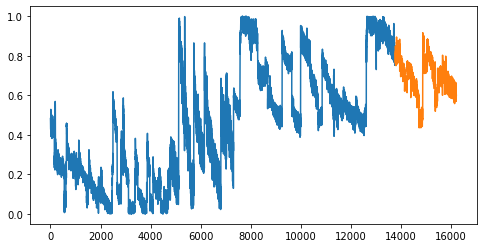

In [36]:
#Divide data into training 70%, validation 15% and testing 15%
#In this first step, we will divide data which will be used to train the model and as prediction
#1st splitting : training (85%); testing (15%)
y_tr_size = int(len(y) * 0.85)
y_tr, y_test = y[0:y_tr_size], y[y_tr_size:len(y)]
X_tr_size = int(len(X) * 0.85)
X_tr, X_test = X[0:X_tr_size], X[X_tr_size:len(X)]
print('Observations: %d' % (len(y)))
print('Training Observations: %d' % (len(y_tr)))
print('Testing Observations: %d' % (len(y_test)))
plt.subplots(figsize=(8,4))
plt.plot(y_tr)
plt.plot([None for i in y_tr] + [X for X in y_test])
plt.show()

In [37]:
print('Training Features Shape:', X_tr.shape)
print('Training Targets Shape:', X_test.shape)
print('Testing Features Shape:', y_tr.shape)
print('Testing Targets Shape:', y_test.shape)

Training Features Shape: (13781, 16)
Training Targets Shape: (2432, 16)
Testing Features Shape: (13781,)
Testing Targets Shape: (2432,)


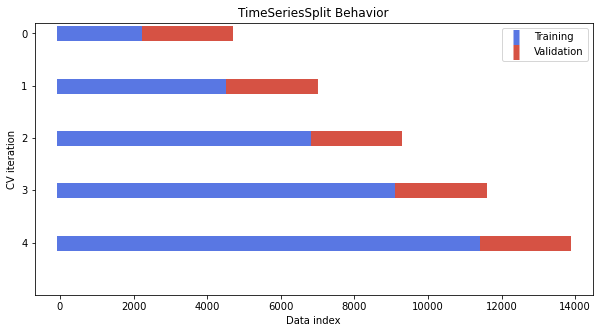

In [38]:
#Import and initialize the cross-validation iterator
#In the second step, we split training data from 1st step into training (80%); validation (20%)
from sklearn.model_selection import TimeSeriesSplit

n_splits = 5
ts_split = TimeSeriesSplit(n_splits)

fig, ax = plt.subplots(figsize=(10,5))
for ii, (tr, tt) in enumerate(ts_split.split(X_tr, y_tr)):
    
    #Plot training and testing indices
    l1 = ax.scatter(tr, [ii] * len(tr), c=[plt.cm.coolwarm(.1)],
                    marker='_', lw=15)
    l2 = ax.scatter(tt, [ii] * len(tt), c=[plt.cm.coolwarm(.9)],
                    marker='_', lw=15)
    ax.set(ylim=[n_splits, -.2], yticks=np.arange(n_splits), title='TimeSeriesSplit Behavior', xlabel='Data index', ylabel='CV iteration')
    ax.legend([l1, l2], ['Training', 'Validation'])

In [39]:
for train_index, test_index in ts_split.split(X_tr, y_tr):
     print("TRAIN:", train_index, "TEST:", test_index)

     #To get the indices 
     X_train, X_val = X_tr[train_index], X_tr[test_index]
     y_train, y_val = y_tr[train_index], y_tr[test_index]

TRAIN: [   0    1    2 ... 2298 2299 2300] TEST: [2301 2302 2303 ... 4594 4595 4596]
TRAIN: [   0    1    2 ... 4594 4595 4596] TEST: [4597 4598 4599 ... 6890 6891 6892]
TRAIN: [   0    1    2 ... 6890 6891 6892] TEST: [6893 6894 6895 ... 9186 9187 9188]
TRAIN: [   0    1    2 ... 9186 9187 9188] TEST: [ 9189  9190  9191 ... 11482 11483 11484]
TRAIN: [    0     1     2 ... 11482 11483 11484] TEST: [11485 11486 11487 ... 13778 13779 13780]


In [40]:
print('Training Features Shape:', X_train.shape)
print('Training Targets Shape:', y_train.shape)
print('Validation Features Shape:', X_val.shape)
print('Validation Targets Shape:', y_val.shape)

Training Features Shape: (11485, 16)
Training Targets Shape: (11485,)
Validation Features Shape: (2296, 16)
Validation Targets Shape: (2296,)


In [41]:
#Measurement metrics for inverted scale
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score 
from sklearn.linear_model import LinearRegression
from math import log
    
def model_metrics(actual, predict):
    ac = return_conversion_scale(actual)
    pr = return_conversion_scale(predict)
    print('Mean Absolute Error:', metrics.mean_absolute_error(ac, pr))
    print('Mean Squared Error:', metrics.mean_squared_error(ac, pr))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ac, pr)))
    print('Coefficient of Determination:', r2_score(actual, predict)) 
    
    # calculate aic for regression
    lr_model = LinearRegression()
    lr_model.fit(pr.reshape(-1, 1), ac.reshape(-1, 1))
    # number of parameters
    num_params = len(lr_model.coef_) + 1
    # predict the training set
    yhat = lr_model.predict(pr.reshape(-1, 1))
    # calculate the error
    mse = metrics.mean_squared_error(ac, yhat)
    # calculate the aic
    aic = len(ac) * log(mse) + 2 * num_params
    print('Akaike Information Criterion: %.3f' % aic)
    
    # calculate bic for regression
    bic = len(ac) * log(mse) + num_params * log(len(ac))
    print('Bayesian Information Criterion: %.3f' % bic)

# MACHINE LEARNING MODEL : KNN REGRESSION

In [42]:
# evaluate an elastic net model on the dataset
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor


#Built default KNN model
model = KNeighborsRegressor()
model.fit(X_train, y_train)

KNeighborsRegressor()

In [43]:
predict = model.predict(X_val)

In [44]:
model_metrics(y_val, predict)

Mean Absolute Error: 0.5056044294394902
Mean Squared Error: 0.4125078080468673
Root Mean Squared Error: 0.6422677074607342
Coefficient of Determination: 0.9747975420198427
Akaike Information Criterion: -2412.186
Bayesian Information Criterion: -2400.708


<Figure size 640x480 with 0 Axes>

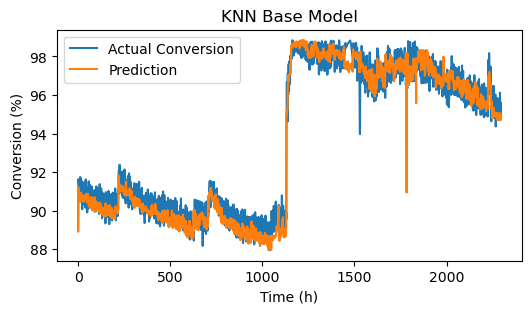

In [45]:
#Plot actual vs prediction
with plt.style.context('default'):
    plt.figure()
    plt.subplots(figsize=(6,3))
    plt.plot(return_conversion_scale(y_val), label = "Actual Conversion")
    plt.plot(return_conversion_scale(predict), label = "Prediction")
    #plt.grid()
    plt.title('KNN Base Model')
    plt.xlabel('Time (h)')
    plt.ylabel('Conversion (%)')
    plt.legend(loc='best')
    plt.show()

In [46]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [47]:
#Determine the parameters for grid search
n_neighbors = np.arange(1, 21, 1)
weights = ['uniform', 'distance']

knn_params = {'n_neighbors':n_neighbors,
              'weights':weights}
print(knn_params)

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]), 'weights': ['uniform', 'distance']}


In [48]:
#GridSearch with Cross Validation

search = GridSearchCV(model, knn_params, scoring='neg_mean_absolute_error', return_train_score = True, cv=ts_split, n_jobs=-1, verbose = 2)
results = search.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   29.4s finished


In [49]:
results.best_estimator_

KNeighborsRegressor(n_neighbors=11, weights='distance')

In [50]:
#pd.DataFrame(results.cv_results_).to_excel('knn_grid_result.xlsx')

In [51]:
knn_model = results.best_estimator_

In [52]:
predict_val = knn_model.predict(X_val)

In [53]:
model_metrics(y_val, predict_val)

Mean Absolute Error: 0.5226415714797086
Mean Squared Error: 0.4401442381882506
Root Mean Squared Error: 0.663433672787454
Coefficient of Determination: 0.9750241888040243
Akaike Information Criterion: -2433.419
Bayesian Information Criterion: -2421.941


<Figure size 640x480 with 0 Axes>

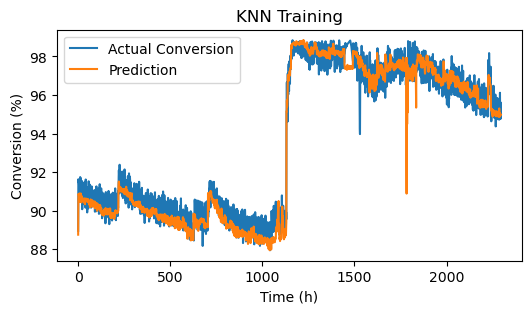

In [54]:
#Plot actual vs prediction
with plt.style.context('default'):
    plt.figure()
    plt.subplots(figsize=(6,3))
    plt.plot(return_conversion_scale(y_val), label = "Actual Conversion")
    plt.plot(return_conversion_scale(predict_val), label = "Prediction")
    #plt.grid()
    plt.title('KNN Training')
    plt.xlabel('Time (h)')
    plt.ylabel('Conversion (%)')
    plt.legend(loc='best')
    plt.show()

No handles with labels found to put in legend.


<Figure size 640x480 with 0 Axes>

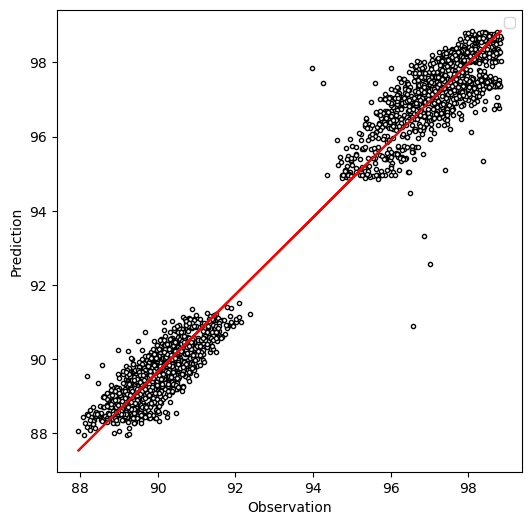

In [55]:
#Plot relationship between observed and predicted value
m_train, b_train = np.polyfit(return_conversion_scale(y_val), return_conversion_scale(predict_val), 1)
#Plot actual vs prediction
with plt.style.context('default'):
    plt.figure()
    plt.subplots(figsize=(6,6))
    plt.plot(return_conversion_scale(y_val), return_conversion_scale(predict_val), 'o', 
             markeredgecolor='k', markersize=3, markerfacecolor='w')
    plt.plot(return_conversion_scale(y_val), m_train*(return_conversion_scale(y_val)) + b_train, color = 'r')
    #plt.grid()
    #plt.title('Random Forrest Regression Base Model')
    plt.xlabel('Observation')
    plt.ylabel('Prediction')
    plt.legend(loc='best')
    plt.show()

In [56]:
predict_test = knn_model.predict(X_test)

In [57]:
model_metrics(y_test, predict_test)

Mean Absolute Error: 0.8092729727361264
Mean Squared Error: 1.136686664188151
Root Mean Squared Error: 1.0661550844920034
Coefficient of Determination: 0.7380417781825729
Akaike Information Criterion: 91.640
Bayesian Information Criterion: 103.233


<Figure size 640x480 with 0 Axes>

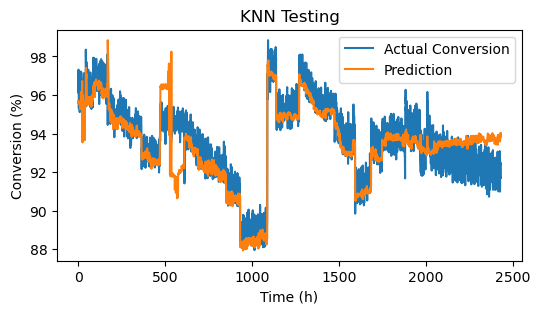

In [58]:
#Plot actual vs prediction
with plt.style.context('default'):
    plt.figure()
    plt.subplots(figsize=(6,3))
    plt.plot(return_conversion_scale(y_test), label = "Actual Conversion")
    plt.plot(return_conversion_scale(predict_test), label = "Prediction")
    #plt.grid()
    plt.title('KNN Testing')
    plt.xlabel('Time (h)')
    plt.ylabel('Conversion (%)')
    plt.legend(loc='best')
    plt.show()

No handles with labels found to put in legend.


<Figure size 640x480 with 0 Axes>

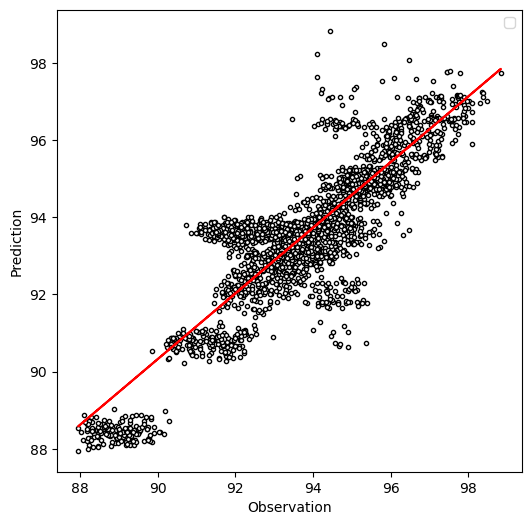

In [59]:
#Plot relationship between observed and predicted value
m_test, b_test = np.polyfit(return_conversion_scale(y_test), return_conversion_scale(predict_test), 1)
#Plot actual vs prediction
with plt.style.context('default'):
    plt.figure()
    plt.subplots(figsize=(6,6))
    plt.plot(return_conversion_scale(y_test), return_conversion_scale(predict_test), 'o', 
             markeredgecolor='k', markersize=3, markerfacecolor='w')
    plt.plot(return_conversion_scale(y_test), m_test*(return_conversion_scale(y_test)) + b_test, color = 'r')
    plt.xlabel('Observation')
    plt.ylabel('Prediction')
    plt.legend(loc='best')
    plt.show()